In [1]:
import numpy as np

from gradvi.normal_means import NormalMeans
from gradvi.tests import toy_priors
from gradvi.tests import toy_data
from gradvi.inference import root_find

from scipy import optimize as sp_optimize

In [2]:
_epsilon = np.sqrt(np.finfo(float).eps)

In [22]:
def cubefun(x, a, b):
    x2 = np.square(x)
    f = a * x2 * x - b
    return f

def cubefun_grad(x, a, b):
    x2 = np.square(x)
    f  = a * x2 * x - b
    df = 3.0 * a * x2
    return f, df

def cubefun_solve(a, b):
    xr = np.cbrt(b / a)
    return xr


def cubefun_bracket(a, b):
    xr = cubefun_solve(a, b)
    n  = xr.shape[0]
    xlo = xr - np.abs(np.random.normal(1, 0.2, size = n))
    xup = xr + np.abs(np.random.normal(1, 0.2, size = n))
    return [xlo, xup]

In [23]:
np.random.seed(100)
n = 10
a = np.random.normal(10, 1, size = n)
b = np.random.normal(2, 1, size = n)
x0 = np.ones(n)
xtrue = cubefun_solve(a, b)

In [32]:
root_find.vec_root(cubefun, x0, (a, b), method = 'hybr', jac = False, options = {'full_output' : True})

     fun: array([-4.40045778e-11, -2.75873546e-10, -4.39241976e-11,  9.87645521e-11,
        1.63878688e-10,  2.78507661e-10,  2.34268382e-10, -5.63433744e-11,
       -3.98644673e-10,  3.20155014e-12])
     jac: array([[-8.66837609e-01, -5.23793931e-02, -1.84662799e-02,
        -3.12122723e-02, -1.27676780e-01,  4.03046679e-01,
         1.44471454e-01,  8.01049486e-03, -1.54491897e-01,
         1.44851127e-01],
       [ 8.41394363e-02, -9.57221178e-01,  3.83536442e-02,
        -1.30575872e-01,  1.87153844e-01,  8.02114003e-02,
         4.77681727e-02, -3.11631537e-02,  6.30009288e-02,
         9.71834511e-02],
       [ 3.79756899e-02, -2.76644120e-02, -2.69321852e-01,
         7.81460905e-02, -1.31612693e-03, -1.79691523e-01,
        -4.73980470e-01, -9.37060992e-02, -5.34641629e-01,
         6.06284331e-01],
       [-6.04299879e-03,  1.56184732e-01,  7.06754536e-02,
        -9.46329737e-01,  4.91799164e-02, -4.23068232e-02,
        -5.88716979e-02, -2.30923203e-01,  4.74349213e-02,
  

In [25]:
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
root_find.vec_root(cubefun_grad, np.repeat(1.0, n), (a, b), method = 'newton', jac = True, options = {'full_output' : True})

     fun: array([-4.44089210e-16,  4.44089210e-16,  6.66133815e-16,  0.00000000e+00,
       -4.44089210e-16,  6.66133815e-16, -4.44089210e-16,  0.00000000e+00,
        2.22044605e-16,  6.99107439e-13])
     jac: array([ 8.09085718, 11.83089787,  8.45364314, 12.78190148, 12.8422714 ,
       10.06645037,  8.41228919, 13.03188523,  8.64531012,  5.99295567])
 message: 'The solution converged'
    nfev: 7
   niter: 7
    norm: 6.991086727742096e-13
  status: 1
 success: True
       x: array([0.57174647, 0.61749248, 0.50264895, 0.66113334, 0.62435703,
       0.56492272, 0.52377644, 0.69745842, 0.54198092, 0.44135906])

In [31]:
root_find.vec_root(cubefun, x0, (a, b), method = 'trisection', bracket = cubefun_bracket(a, b), options = {'full_output' : True})

     fun: array([ 5.71993009e-09,  1.11244658e-09, -6.11773276e-09, -5.24242072e-09,
       -6.52548904e-09, -3.39937922e-09, -5.30049782e-10,  5.66263791e-09,
       -3.44285245e-09,  3.01634995e-09])
 message: 'The solution converged'
    nfev: 40
   niter: 19
    norm: 1.436316726697632e-08
  status: 1
 success: True
       x: array([0.57174647, 0.61749248, 0.50264895, 0.66113334, 0.62435703,
       0.56492272, 0.52377644, 0.69745842, 0.54198092, 0.44135906])

In [12]:
b0

array([33.15210274, 41.49140401, 44.72407989, 39.11828283, 44.0389657 ,
       42.17559443, 41.0068314 , 35.85953176, 39.36922495, 41.14171695])

In [14]:
fun1(a0, y) * fun1(b0, y)

array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100.])

In [15]:
fun1(a0, y)

array([-10., -10., -10., -10., -10., -10., -10., -10., -10., -10.])

In [16]:
fun1(b0, y)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [7]:
root_find.vec_root(fun1, x0, y, method = 'trisection', bracket = [a0, b0], options = {'full_output' : True})

     fun: array([ 1.14216618e-08, -8.56198312e-09, -7.49150786e-09, -7.83415999e-09,
        8.63019523e-09,  1.15032890e-08, -8.77594175e-09, -8.69181349e-09,
        1.21660833e-08, -1.44952992e-08, -3.65639607e-09,  1.70666681e-09,
        2.97404767e-09,  6.31825969e-09,  9.19953891e-09,  1.30489752e-09,
        7.01675162e-10,  1.71348802e-09,  1.42779299e-08,  6.76959644e-09,
        7.61474439e-09, -5.50289769e-09,  1.26487976e-08, -9.78161552e-10,
        1.41790224e-08, -4.70754458e-09, -3.39764483e-09,  1.21231096e-08,
       -3.06727088e-10,  7.38396011e-09, -1.22622623e-09, -8.41419023e-09,
       -6.90010893e-09, -6.38237907e-10, -5.50517143e-09,  7.78095455e-09,
        6.73503564e-09, -3.35217010e-09, -1.51385393e-09,  2.50770427e-09,
       -1.43534180e-08, -3.82442522e-10,  1.09139364e-11, -6.06519279e-09,
        4.71459316e-09, -9.19430931e-09, -1.74577508e-09,  2.46154741e-09,
        9.77706804e-11,  1.23372956e-09, -6.52880772e-09,  2.59387889e-09,
        8.09313

In [5]:
root_find.vec_root(fun1_grad, x0, y, method = 'newton', jac = True, options = {'full_output' : True})

Options:
{'full_output': True}


     fun: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
     jac: array([66.00187622, 82.74144323, 89.22428642, 77.98051171, 87.8505663 ,
       84.11375073, 81.76943735, 71.43965336, 78.48403335, 82.04001155])
 message: 'The solution converged'
    nfev: 11
   niter: 11
    norm: 0.0
  status: 1
 success: True
       x: array([33.00093811, 41.37072161, 44.61214321, 38.99025585, 43.92528315,
       42.05687537, 40.88471868, 35.71982668, 39.24201668, 41.02000578])

In [6]:
root_find.vec_root(fun1_grad, x0, y, method = 'newton', jac = True, options = {'full_output' : False})

Options:
{'full_output': False}


array([33.00093811, 41.37072161, 44.61214321, 38.99025585, 43.92528315,
       42.05687537, 40.88471868, 35.71982668, 39.24201668, 41.02000578])

In [7]:
root_find.vec_root(fun1, x0, y, method = 'hybr', jac = False, options = {'full_output' : False})

Options:
{'full_output': False}


array([33.00093811, 41.37072161, 44.61214321, 38.99025585, 43.92528315,
       42.05687537, 40.88471868, 35.71982668, 39.24201668, 41.02000578])

In [9]:
root_find.vec_root(fun1, x0, y, method = 'trisection', bracket = [a0, b0], options = {'full_output' : True})

Options:
{'full_output': True}


     fun: array([ 1.14216618e-08, -8.56198312e-09, -7.49150786e-09, -7.83415999e-09,
        8.63019523e-09,  1.15032890e-08, -8.77594175e-09, -8.69181349e-09,
        1.21660833e-08, -1.44952992e-08])
 message: 'The solution converged'
    nfev: 4
   niter: 1
    norm: 3.22297478969104e-08
  status: 1
 success: True
       x: array([33.00093811, 41.37072161, 44.61214321, 38.99025585, 43.92528315,
       42.05687537, 40.88471868, 35.71982668, 39.24201668, 41.02000578])

In [10]:
y_fssi = np.random.normal(0, 1, size = n)

In [11]:
fun1_fssi(y_fssi, 2)

(array([-1.92177790e-01,  1.64811436e-01, -3.97525319e-01,  1.09006467e+00,
         6.08884018e-01, -2.27651518e-03, -2.99917165e-01,  2.18375288e+00,
        -1.68211503e-01, -2.79721745e+00]),
 array([1.25873232, 1.13620357, 2.0434991 , 4.00343483, 2.71531969,
        0.06541012, 1.69355303, 6.36209642, 1.15177694, 7.5038142 ]))

In [12]:
fun1_fssi(np.atleast_1d(2.3), 2)

(array([24.334]), array([31.74]))

In [16]:
x_fssi = root_find.vec_root(fun1_fssi, x0, 2.0, method = 'fssi-linear', bounds = [0.1, 10], 
                            options = {'full_output' : True, 'grid_scale': 'linear'}, fx = y_fssi)

Options:
{'full_output': True, 'grid_scale': 'linear'}
{}


In [17]:
x_fssi

 bounds: [0.1, 10]
    fun: array([0.002     , 0.43488272, 0.002     , 0.81644723, 0.67269968,
       0.002     , 0.002     , 1.02929979, 0.002     , 0.002     ])
   grid: (array([2.00000000e-03, 3.44216679e-03, 5.45037888e-03, 8.11834610e-03,
       1.15397783e-02, 1.58083853e-02, 2.10178769e-02, 2.72619631e-02,
       3.46343535e-02, 4.32287581e-02, 5.31388868e-02, 6.44584493e-02,
       7.72811554e-02, 9.17007151e-02, 1.07810838e-01, 1.25705234e-01,
       1.45477614e-01, 1.67221686e-01, 1.91031161e-01, 2.16999748e-01,
       2.45221158e-01, 2.75789100e-01, 3.08797284e-01, 3.44339420e-01,
       3.82509218e-01, 4.23400388e-01, 4.67106639e-01, 5.13721681e-01,
       5.63339224e-01, 6.16052978e-01, 6.71956653e-01, 7.31143959e-01,
       7.93708605e-01, 8.59744301e-01, 9.29344758e-01, 1.00260368e+00,
       1.07961479e+00, 1.16047179e+00, 1.24526838e+00, 1.33409829e+00,
       1.42705521e+00, 1.52423286e+00, 1.62572496e+00, 1.73162520e+00,
       1.84202730e+00, 1.95702496e+00, 2.07671

In [18]:
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

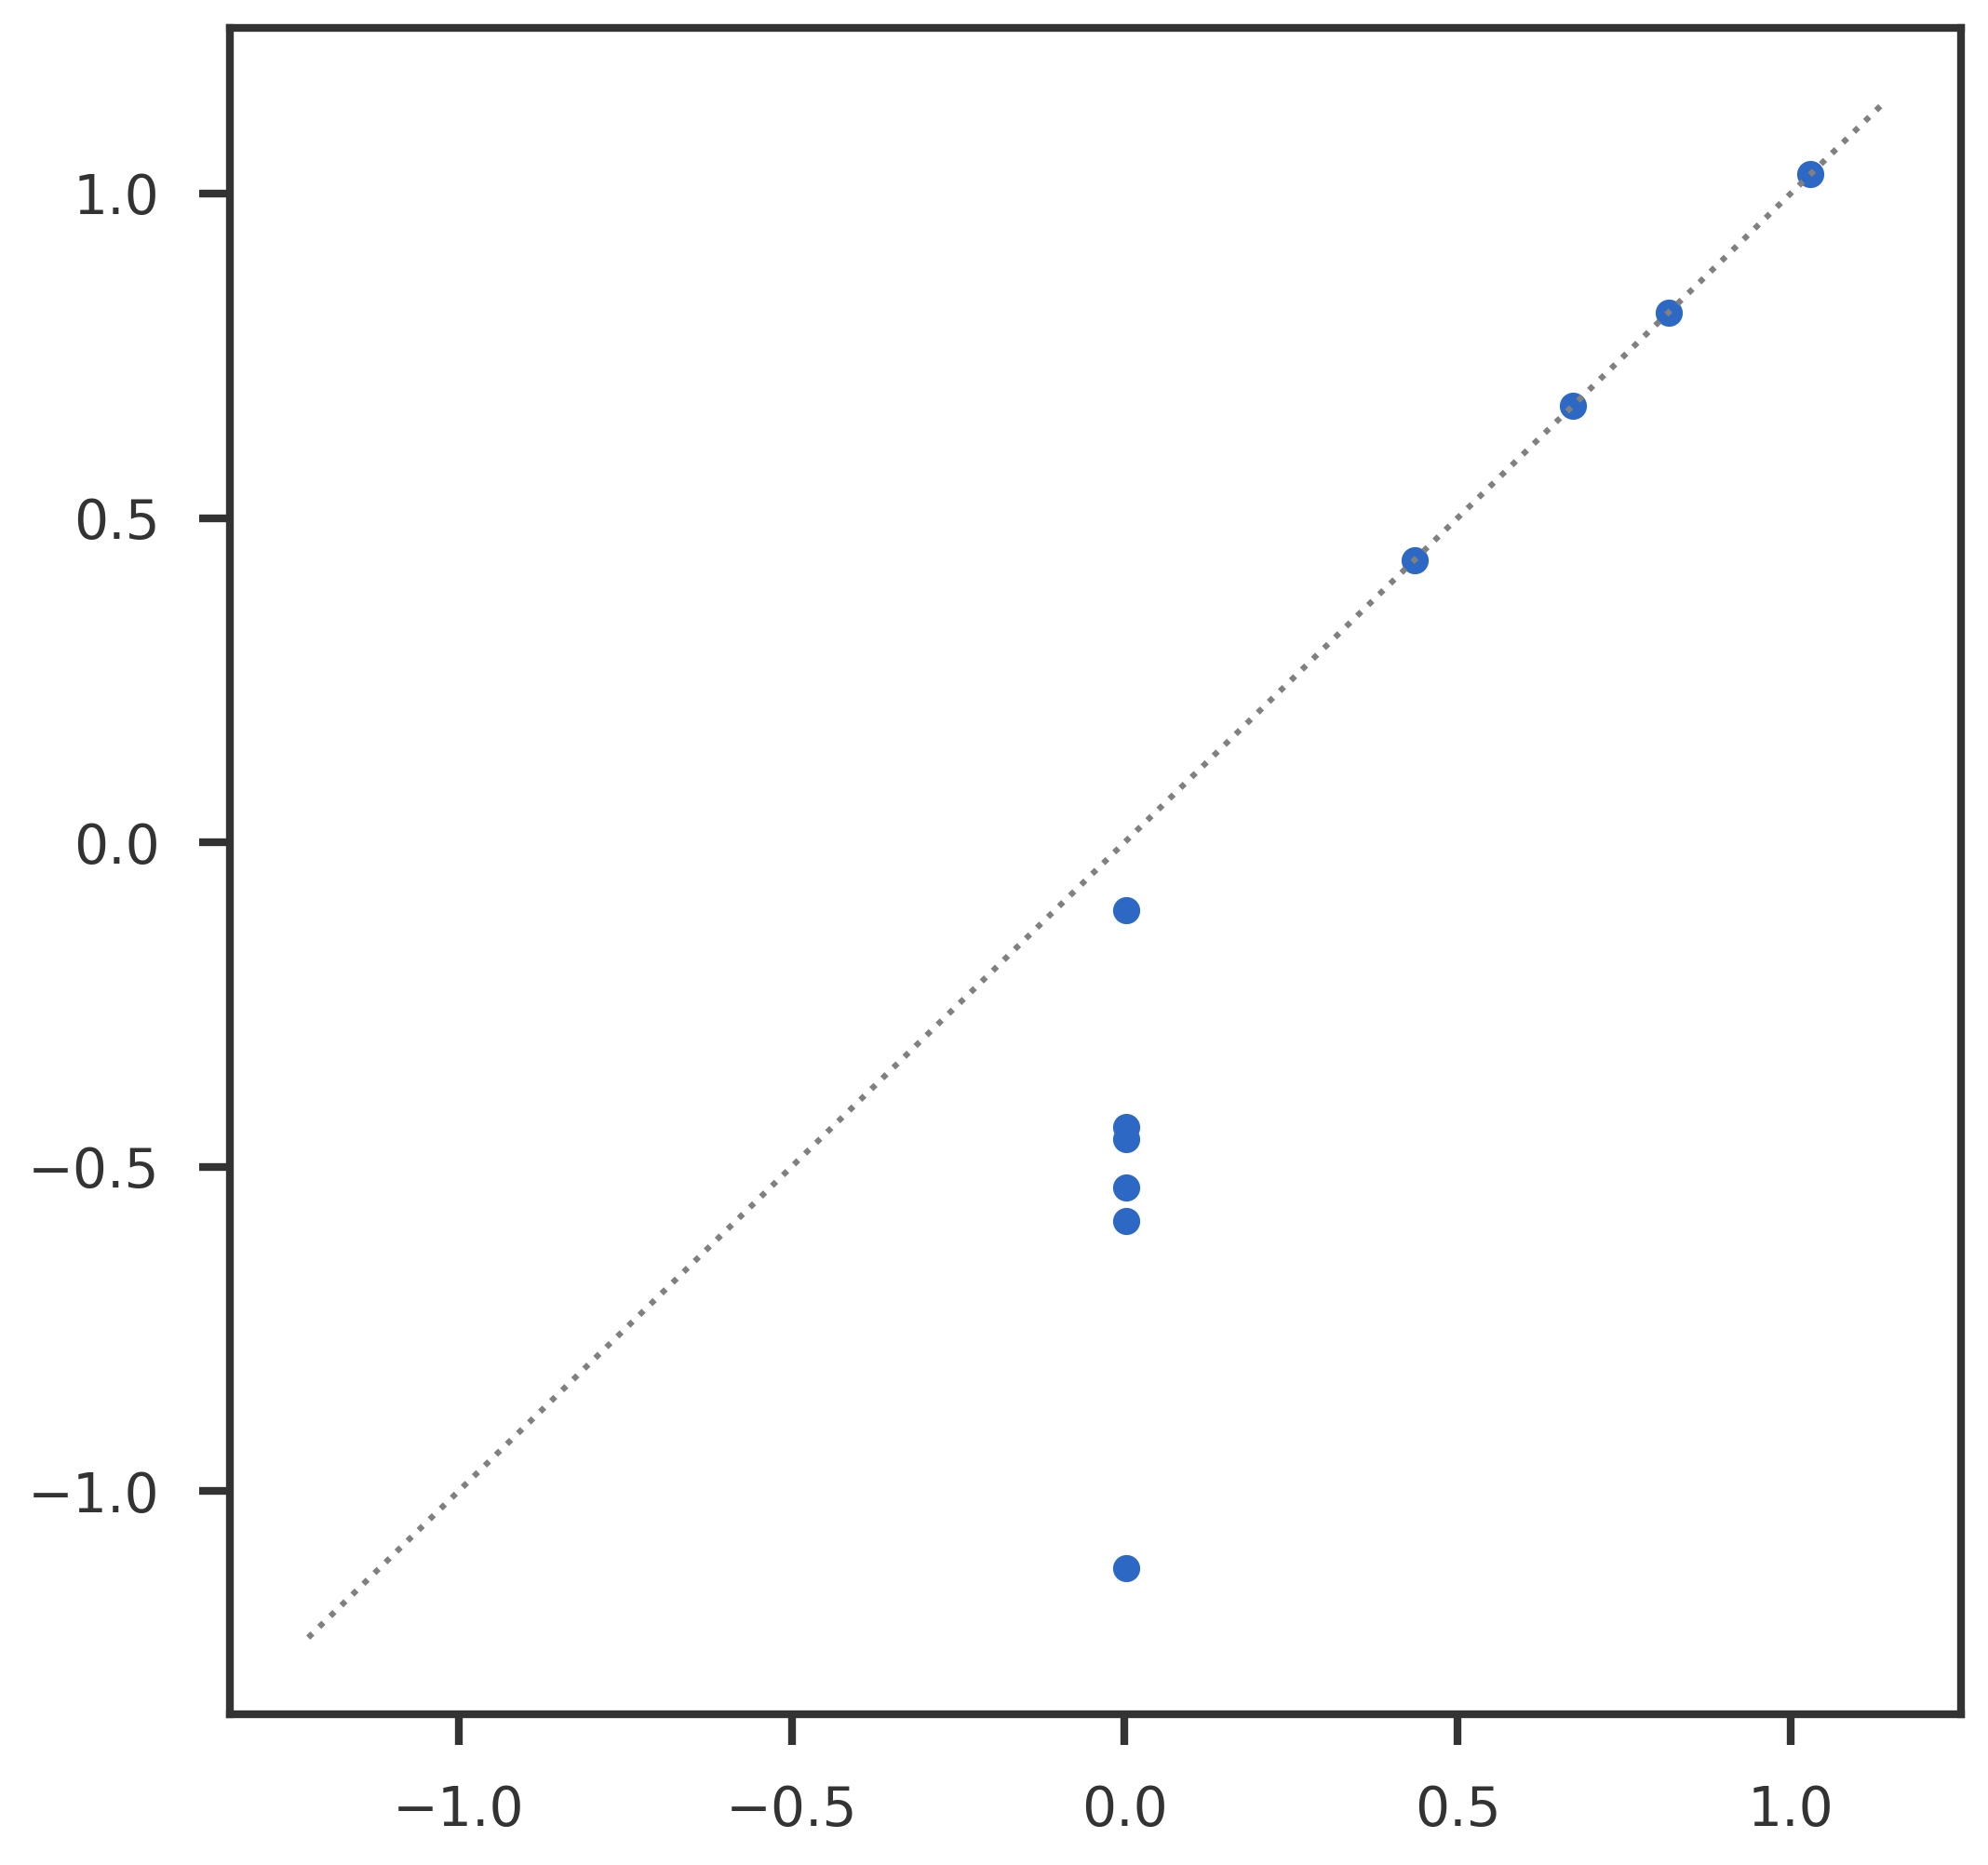

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.plot(x_fssi.grid[0], x_fssi.grid[1])
ax1.scatter(x_fssi.fun, y_fssi)
mpl_utils.plot_diag(ax1)
plt.show()

In [20]:
np.power(np.abs(y_fssi / 2.0), 1/3) * np.sign(y_fssi)

array([-0.61181533,  0.60146102, -0.66327537,  0.74194251,  0.69545381,
       -0.37374233, -0.64283265,  0.80149011, -0.60282722, -0.82384429])

In [21]:
y_fssi

array([-0.45802699,  0.43516349, -0.58359505,  0.81684707,  0.67272081,
       -0.10441114, -0.53128038,  1.02973269, -0.43813562, -1.11831825])

In [23]:
fun1_fssi(x_fssi, 2.0)[0]

array([-2.00000000e-12,  4.35133326e-01, -2.00000000e-12,  8.16624287e-01,
        6.72549556e-01, -2.00000000e-12, -2.00000000e-12,  1.02943759e+00,
       -2.00000000e-12, -2.00000000e-12])

In [16]:
bracket = [a0, b0]

In [17]:
def root_hybr(func, x0, fprime,
        args = (), tol = _epsilon,
        maxiter = 0, full_output = None,
        **unknown_options):

    if maxiter == 0: maxiter = 200 * (x0.shape[0] + 1)

    # fprime = True is not suggessted 
    # because it will use the jacobian form
    # assuming that we are minimizing a vector 
    # valued function. 
    if fprime:
        def jfunc(x0, *args):
            f, fprime = func(x0, *args)
            return f, np.diag(f)
    else:
        jfunc = func

    opt = sp_optimize.root(
        jfunc, x0,
        args = args,
        method = 'hybr',
        jac = fprime,
        tol = tol,
        options = {'maxfev' : maxiter})
    return opt

In [18]:
xres = root_hybr(fun1_grad, np.zeros(n), True, args = (y,), maxiter = 10000, full_output = True)

In [20]:
xres.keys()

dict_keys(['x', 'success', 'status', 'nfev', 'njev', 'fjac', 'r', 'qtf', 'fun', 'message'])

In [21]:
xres2 = root_hybr(fun1, np.zeros(n), False, args = (y,), maxiter = 10000, full_output = True)

In [22]:
xres2.keys()

dict_keys(['x', 'success', 'status', 'nfev', 'fjac', 'r', 'qtf', 'fun', 'message'])

In [18]:
c0, d0 = tuple(bracket)

In [19]:
c0

array([32.84907786, 41.24968614, 44.49992496, ..., 38.14281229,
       37.20898875, 48.95956828])

In [20]:
d0

array([33.15210274, 41.49140401, 44.72407989, ..., 38.40409001,
       37.47677739, 49.16339417])

In [17]:
tuple(bracket)

(array([32.84907786, 41.24968614, 44.49992496, ..., 38.14281229,
        37.20898875, 48.95956828]),
 array([33.15210274, 41.49140401, 44.72407989, ..., 38.40409001,
        37.47677739, 49.16339417]))

In [21]:
m = 2

In [25]:
np.atleast_1d(m)

array([2])

In [8]:
options = {}
options.get('return_all', False)

False

In [20]:
xres = vmin_hybr(fun1_grad, np.zeros(n), True, args = (y,), maxiter = 10000, full_output = True)

In [15]:
np.allclose(xres[0], np.sqrt(y))

True

In [16]:
xres[1]

array([ 7.51269181e-06, -1.45798685e-06,  3.51060180e-07, ...,
        2.83098666e-06,  2.49183427e-06,  2.60970410e-07])

In [18]:
xres[3]

    fjac: array([[-9.97156130e-01, -1.01521999e-04,  1.08971100e-04, ...,
         3.85675775e-05,  3.31396870e-04, -1.12084105e-05],
       [ 2.16020605e-04, -9.99915336e-01, -1.27385393e-05, ...,
        -3.07040630e-04, -2.43314825e-04,  3.68720285e-05],
       [-2.05943453e-04,  1.04600103e-04, -9.99949306e-01, ...,
        -1.06537370e-04, -7.73441134e-05, -2.90775069e-05],
       ...,
       [-4.80308633e-05,  1.79453195e-04,  2.35262330e-05, ...,
        -9.99941114e-01, -2.13081982e-04, -3.96467427e-06],
       [-2.09153481e-04,  1.10343489e-04,  3.47189968e-07, ...,
         3.39067729e-04, -9.99916485e-01,  1.88665384e-06],
       [ 1.26881291e-05, -2.63376911e-05,  3.18804328e-05, ...,
        -4.28559803e-06, -1.34597496e-05, -9.99992322e-01]])
     fun: array([ 7.51269181e-06, -1.45798685e-06,  3.51060180e-07, ...,
        2.83098666e-06,  2.49183427e-06,  2.60970410e-07])
 message: 'The solution converged.'
    nfev: 8032
     qtf: array([ 3.94613159e-05,  7.86592166e-06,

In [19]:
opt

    fjac: array([[-9.96238439e-01,  1.96674363e-05,  5.38395398e-05, ...,
        -1.68194613e-04,  7.91054835e-05,  7.49252156e-07],
       [-1.43147156e-05, -9.99915913e-01, -2.70943820e-06, ...,
        -2.87158177e-04, -2.07789201e-04,  3.07398139e-05],
       [-1.51235275e-04,  9.69386640e-05, -9.99949768e-01, ...,
        -1.06428038e-04, -8.41951080e-05, -2.59907828e-05],
       ...,
       [ 2.13788891e-05,  1.63678024e-04,  2.52295743e-05, ...,
        -9.99934951e-01, -2.46150501e-04,  3.47856502e-06],
       [-1.25006638e-04,  7.82009039e-05,  1.09052703e-05, ...,
         3.87010309e-04, -9.99905826e-01,  1.31012043e-05],
       [ 8.43644089e-06, -1.96827846e-05,  2.80629677e-05, ...,
        -1.19001018e-05, -2.50732696e-05, -9.99992568e-01]])
     fun: array([-1.27383646e-06,  1.18421440e-07,  2.29647412e-10, ...,
       -2.89732043e-07, -1.79431936e-08, -4.53055691e-08])
 message: 'The solution converged.'
    nfev: 34
    njev: 2
     qtf: array([ 1.06742536e-05, -1.027

In [3]:
n = 4000

np.random.seed(100)
y = np.square(np.random.normal(40, 4, size = n))

a0 = np.sqrt(y - 10)
b0 = np.sqrt(y + 10)

In [4]:
np.sqrt(y)

array([33.00093811, 41.37072161, 44.61214321, ..., 38.27367411,
       37.34312311, 49.06158707])

In [5]:
a0

array([32.84907786, 41.24968614, 44.49992496, ..., 38.14281229,
       37.20898875, 48.95956828])

In [6]:
b0

array([33.15210274, 41.49140401, 44.72407989, ..., 38.40409001,
       37.47677739, 49.16339417])

In [7]:
fa0 = fun1(a0, y)
fb0 = fun1(b0, y)

In [8]:
np.all(np.sign(fa0) * np.sign(fb0) < 0)

True

In [9]:
def rootfind_trisection(func, a0, b0, args=(), tol=1.48e-08, maxiter=500):
    
    a = a0.copy()
    b = b0.copy()
    n = a0.shape[0]
    
    # Mask for checking which elements in the array
    # still needs to be updated
    umask = np.full(n, True, dtype = bool)
    
    fa = func(a, *args)
    fb = func(b, *args)
    if not np.all(fb > fa):
        raise ValueError("Trisection - one of the lower bounds is greater than an upper bound.")
    if np.any(np.sign(fb) * np.sign(fa) > 0):
        raise ValueError("Trisection - function must have opposite signs at the boundaries. ")
        
    fn = fa.copy()
    xr = (a0 + b0) / 2.0
    nfev = 2
    
    #print (f"Iteration 0. x: {xr} a: {a} b: {b} fn: {fn} umask: {umask}")
    
    for itr in range(maxiter):
        # ============
        # Select new points, evaluate fun
        # ============
        x1 = (2.0 * a + b) / 3.0
        x2 = (2.0 * b + a) / 3.0
        fx1 = func(x1, *args)
        fx2 = func(x2, *args)
        nfev += 2

        # ============
        # set  x = x1 if f(x1) < f(x2)
        # else x = x2
        # ============
        xr[umask] =  x2[umask]
        fn[umask] = fx2[umask]
        x1mask = np.logical_and(np.abs(fx1) < np.abs(fx2), umask)
        if np.any(x1mask):
            xr[x1mask] =  x1[x1mask]
            fn[x1mask] = fx1[x1mask]
        #print(fn, umask)
        umask = np.abs(fn) > tol
        if np.all(umask == False):
            break
        # ============
        # Select new values of a and b
        #
        #   a ----- x1 ----- x2 ----- b
        #
        # ============
        
        # if umask is False, no need to update
        amask = umask == True
        bmask = umask == True
        
        # if fa * fx1 < 0,
        # decrease upper bound b to x1
        decr_ub = np.logical_and(fa * fx1 < 0, umask)
        b[decr_ub] = x1[decr_ub]
        
        # else if fx1 * fx2 < 0, 
        # decrease upper bound b to x2
        # increase lower bound a to x1
        cntr_ublb = np.logical_and(fx1 * fx2 < 0, umask)
        a[cntr_ublb]  = x1[cntr_ublb]
        b[cntr_ublb]  = x2[cntr_ublb]
        fa[cntr_ublb] = fx1[cntr_ublb]
        
        # for everything else, 
        # increase lower bound a to x2
        incr_lb = umask == True
        incr_lb = np.logical_and(incr_lb, decr_ub == False)
        incr_lb = np.logical_and(incr_lb, cntr_ublb == False)
        a[incr_lb]  = x2[incr_lb]
        fa[incr_lb] = fx2[incr_lb]
        #print (f"Iteration {itr + 1} x: {xr} a: {a} b: {b} fn: {fn} incr_lb: {cntr_ublb}")

    return xr, itr + 1, nfev

In [10]:
xres, niter, nfev = rootfind_trisection(fun1, a0, b0, args = (y,))
print (f"Number of iterations: {niter}")
print (f"Number of function evaluations: {nfev}")

Number of iterations: 19
Number of function evaluations: 40


In [11]:
def inv_func(z, b, prior, sj2, s2, dj):
    nm = NormalMeans.create(z, prior, sj2, scale = s2, d = dj) 
    Mz = nm.shrinkage_operator(jac = False)
    return Mz - b

n = 1000
prior = toy_priors.get_ash_scaled(k = 10, skbase = 10, sparsity = 0.3)
z, sj2, s2, dj = toy_data.get_normal_means(prior, n = n, dj = np.square(np.random.normal(1, 0.4, size = n)) * 200)
nm1 = NormalMeans.create(z, prior, sj2, scale = s2, d = dj)
b = nm1.analytical_posterior_mean

In [12]:
_gold = 1.618034
zlb = np.min(b) * _gold * max(1.0, np.std(b))
zub = np.max(b) * _gold * max(1.0, np.std(b))
zlb = np.repeat(zlb, z.shape[0])
zub = np.repeat(zub, z.shape[0])
flb = inv_func(zlb, b, prior, sj2, s2, dj)
fub = inv_func(zub, b, prior, sj2, s2, dj)

In [13]:
np.all(np.sign(fub) * np.sign(flb) < 0)

True

In [14]:
np.all(fub > flb)

True

In [15]:
znew, niter, nfev = rootfind_trisection(inv_func, zlb, zub, args = (b, prior, sj2, s2, dj))
print (f"Number of iterations: {niter}")
print (f"Number of function evaluations: {nfev}")

Number of iterations: 21
Number of function evaluations: 44


In [16]:
%%timeit -n 10 -r 10
znew, niter, nfev = rootfind_trisection(inv_func, zlb, zub, args = (b, prior, sj2, s2, dj))

26.8 ms ± 130 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [17]:
np.testing.assert_allclose(z, znew, atol = 1e-4, rtol = 1e-8)

In [18]:
from gradvi.normal_means import NormalMeansFromPosterior

In [19]:
%%timeit -n 10 -r 10
znew = NormalMeansFromPosterior(b, prior, sj2, scale = s2, d = dj, method = 'fssi-cubic', ngrid = 500).response

2.27 ms ± 63.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [24]:
%%timeit -n 10 -r 10
znew = NormalMeansFromPosterior(b, prior, sj2, scale = s2, d = dj, method = 'newton', ngrid = 500).response

27.3 ms ± 230 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [37]:
%%timeit -n 1 -r 1
znew = NormalMeansFromPosterior(b, prior, sj2, scale = s2, d = dj, method = 'hybr', ngrid = 500).response

9.17 s ± 3.8 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
